In [11]:
import sys
import os
import numpy as np
sys.path.append(os.path.abspath("../mathematical_models"))
from mathematical_models.f_on_f import FunctionOnFunctionModel
from datetime import datetime

sys.path.append(os.path.abspath("../optimizers"))
from optimizers.cordex_continuous import CordexContinuous

sys.path.append(os.path.abspath("../basis"))
from basis.bspline import BSplineBasis
from basis.polynomial import PolynomialBasis
from basis.basis import plot_design
from basis.basis import Basis
import pandas as pd

import ast
import re

In [12]:
results = pd.read_csv("results_db.tsv", sep='\t')

In [13]:
results

,epochs,refinement,Runs,X family,X degree,X breaks,B family,B degree,B breaks,design,criterion
0,1000,100,12,bpslines,0,1,bsplines,0,1,[[ 1.] [ 1.] [ 1.] [-1.] [-1.] [-1.] [ 1...,0.1666666667
1,1000,100,12,bpslines,0,1,bsplines,0,2,NONE,NONE
2,1000,100,12,bpslines,0,1,bsplines,1,1,NONE,NONE
3,1000,100,12,bpslines,0,1,bsplines,0,3,NONE,NONE
4,1000,100,12,bpslines,0,1,bsplines,1,2,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...
571,1000,100,12,bpslines,2,29,bsplines,2,4,[[-1. -1. -1. -1. ...,44.82615977
572,1000,100,12,bpslines,2,29,bsplines,2,5,[[-1. -1. -1. -1. ...,81.67759637
573,1000,100,12,bpslines,2,29,bsplines,2,6,[[ 1. 1. 1. 1. ...,136.6098394
574,1000,100,12,bpslines,2,29,bsplines,2,7,[[ 1. 1. 1. -1. ...,209.9139329


In [34]:
X_type = "bpslines"
X_degree = 0
X_breaks = 9
B_type = "bsplines"
B_degree = 0
B_breaks = 3

filter_args = {
    'X family': X_type,
    'X degree': X_degree,
    'X breaks': X_breaks,
    'B family': B_type,
    'B degree': B_degree,
    'B breaks': B_breaks
}

filter_args = {k: v for k, v in filter_args.items() if v is not None}

In [35]:
filtered_results = results.copy()
for column, value in filter_args.items():
    filtered_results = filtered_results[filtered_results[column] == value]
min_criterion = filtered_results['criterion'].min()
best_result = filtered_results[filtered_results['criterion'] == min_criterion]

In [36]:
best_result

,epochs,refinement,Runs,X family,X degree,X breaks,B family,B degree,B breaks,design,criterion
99,1000,100,12,bpslines,0,9,bsplines,0,3,[[-1. -1. -1. -1. 1. 1. 1. 1.] [ 1. 1. ...,0.75


In [37]:
x_degree = best_result['X degree'].values[0]

In [38]:
x_bases = [BSplineBasis(degree=best_result['X degree'].values[0], total_knots_num=int(best_result['X breaks'].values[0]))]
N = best_result['Runs'].values[0]
best_objective_value = ast.literal_eval(best_result['criterion'].values[0])
num_of_basis = best_result['X breaks'].values[0]

best_row = best_result.iloc[0]
design_str = best_row['design']
design_str = design_str.strip('[]')
rows_str = design_str.split('] [')
design_list = []
for row_str in rows_str:
    row_str = row_str.replace('[', '').replace(']', '')
    numbers_str = row_str.strip().split()
    row = [float(num) for num in numbers_str]
    design_list.append(row)

best_design = np.array(design_list).reshape(N, -1)

In [39]:
print(np.round(best_design,2))

[[-1. -1. -1. -1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1.  1.  1.  1.]]


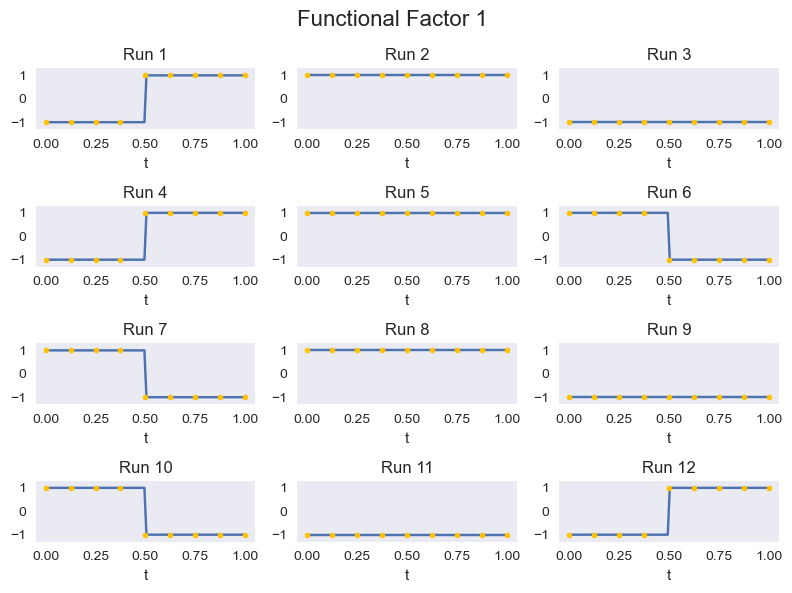

Best objective value: 0.75 for 9 bases.


In [40]:
plot_design(best_design, x_bases, N,
            sub_x=4, sub_y=3, colour="#FFC100", figsize=(8,6)) # FFC100
print(f"Best objective value: {np.round(best_objective_value,3)} for {num_of_basis} bases.")